# Importing Visualization Tools

To prepare for exploratory data analysis, first import essential libraries and ensure the project structure allows access to custom modules.  
The following setup enables importing visualization functions from the `src` directory:

In [35]:
import pandas as pd
import sys
import os

# Add the parent directory to sys.path so 'src' can be imported
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.visualization import *

This setup ensures you can use all custom plotting functions for data exploration and storytelling.

# Load Cleaned Data

Load the preprocessed stock data from the CSV file for analysis:


In [36]:
# Load cleaned data
df = pd.read_csv('data/stock_data.csv')

This creates a DataFrame `df` containing the cleaned and structured data, ready for visualization and further exploration.

# Mapping Tickers to Sectors and Visualizing Insights

To enrich our dataset and enable sector-based analysis, we map each stock ticker to its corresponding sector. If the 'Sector' column does not already exist in the DataFrame, we create it using a predefined mapping.

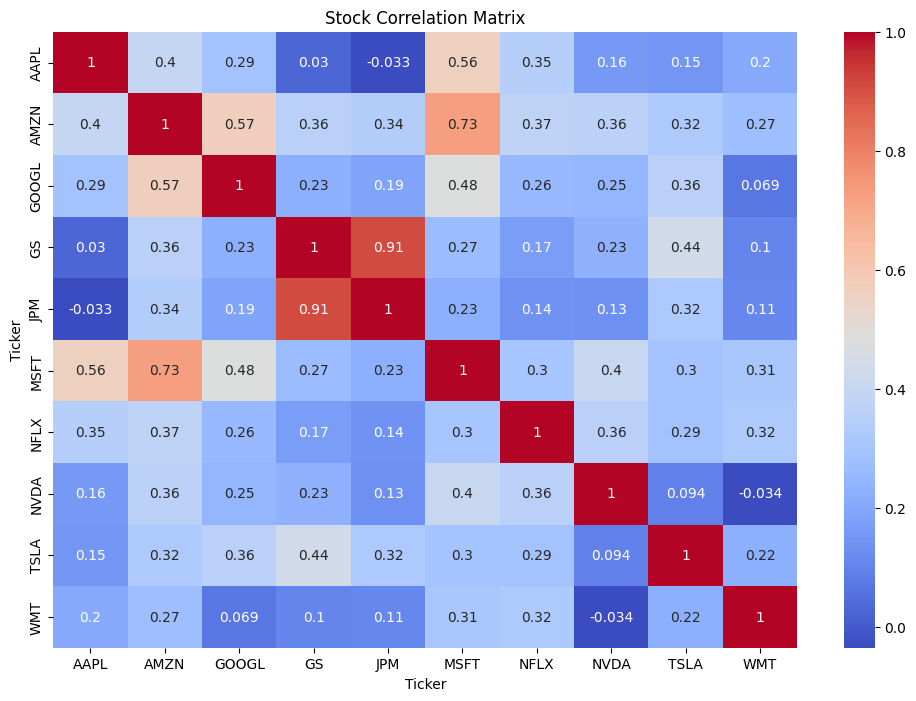

In [37]:
# Example mapping of tickers to sectors (update as needed)
ticker_to_sector = {
	'AAPL': 'Technology',
	'AMZN': 'Consumer Discretionary',
	'GOOGL': 'Communication Services',
	'GS': 'Financials',
	'JPM': 'Financials',
	'MSFT': 'Technology',
	'NFLX': 'Communication Services',
	'NVDA': 'Technology',
	'TSLA': 'Consumer Discretionary',
	'WMT': 'Consumer Staples'
}

# Add 'Sector' column if not present
if 'Sector' not in df.columns:
	df['Sector'] = df['Ticker'].map(ticker_to_sector)

# Plot Apple candlestick chart
plot_candlestick(df, 'AAPL')

# Plot sector performance
plot_sector_performance(df)

# Plot correlation heatmap
plot_correlation_heatmap(df)

With sector information added, we can generate rich visualizations to tell the story of stock performance and relationships:

- **Apple Candlestick Chart:**  
  Visualizes price movements, showing trends and volatility for AAPL over time.
- **Sector Performance:**  
  Compares daily returns across sectors, highlighting which industries outperformed or lagged during the analysis period.
- **Correlation Heatmap:**  
  Reveals relationships between stock returns, identifying clusters of highly correlated companies (often within the same sector).

Each visualization helps interpret the market dynamics, sector trends, and inter-stock relationships, providing a narrative that goes beyond raw numbers.

# Technical Analysis Example

To analyze trends and identify potential trading signals for Apple (AAPL), we calculate two moving averages on the closing price: a short-term (20-day) and a longer-term (50-day) average.

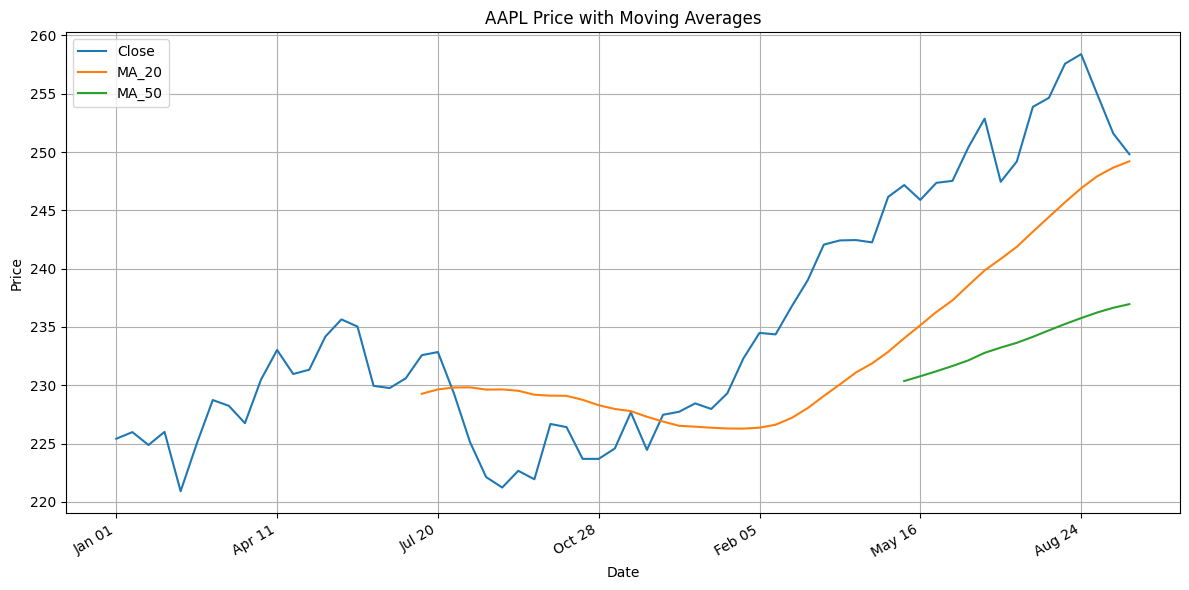

In [ ]:
# Technical analysis example
aapl = df[df['Ticker'] == 'AAPL'].copy()
aapl['MA_20'] = aapl['Close'].rolling(window=20).mean()
aapl['MA_50'] = aapl['Close'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
aapl[['Close', 'MA_20', 'MA_50']].plot(ax=plt.gca())  # specify axes to keep it clean

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # e.g., Oct 01
plt.gcf().autofmt_xdate()  # auto-rotate date labels

plt.title('AAPL Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretation:**  
The plot shows AAPL's (Apple's) closing price alongside its 20-day and 50-day moving averages. Crossovers between these averages can signal shifts in trend—when the short-term average rises above the long-term, it may indicate bullish momentum, while the opposite could signal a bearish trend.